In [1]:
# import bibliothèque
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns



In [5]:
pip install xlrd>=2.0.1


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.0 -> 24.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
titanic_data = pd.read_excel('D:/ETUDES/Etude Machine Learning Marouan/titanic/titanic3.xls')  

In [8]:
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


Exploration de la base de donnée

In [9]:
titanic_data.shape

(1309, 14)

In [5]:
titanic_data.describe()

,pclass,survived,age,sibsp,parch,fare,body
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000,121.000000
mean,2.294882,0.381971,29.881135,0.498854,0.385027,33.295479,160.809917
std,0.837836,0.486055,14.413500,1.041658,0.865560,51.758668,97.696922
min,1.000000,0.000000,0.166700,0.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,21.000000,0.000000,0.000000,7.895800,72.000000
50%,3.000000,0.000000,28.000000,0.000000,0.000000,14.454200,155.000000
75%,3.000000,1.000000,39.000000,1.000000,0.000000,31.275000,256.000000
max,3.000000,1.000000,80.000000,8.000000,9.000000,512.329200,328.000000


In [6]:
titanic_data.dtypes

pclass         int64
survived       int64
name          object
sex           object
age          float64
sibsp          int64
parch          int64
ticket        object
fare         float64
cabin         object
embarked      object
boat          object
body         float64
home.dest     object
dtype: object

In [7]:
titanic_data.isna().sum()

pclass          0
survived        0
name            0
sex             0
age           263
sibsp           0
parch           0
ticket          0
fare            1
cabin        1014
embarked        2
boat          823
body         1188
home.dest     564
dtype: int64

In [8]:
titanic_data['survived'].value_counts()

0    809
1    500
Name: survived, dtype: int64

In [9]:
titanic_data= titanic_data.drop(['cabin','ticket','name','embarked','home.dest','boat','body','sibsp','parch','fare'],axis=1)

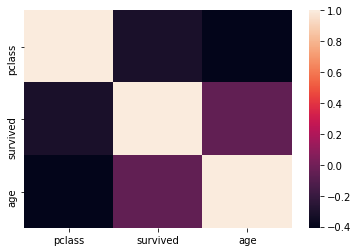

In [10]:
sns.heatmap(titanic_data.corr())
plt.show()

In [11]:
titanic_data

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


## Encodage

In [12]:
def encodage(titanic_data):
    code = {'male': 1,'female':0}
    for col in titanic_data.select_dtypes('object'):
        titanic_data[col]= titanic_data[col].map(code)
    
    return titanic_data

In [13]:
titanic_data = titanic_data.dropna(axis=0)

In [14]:
titanic_data.shape

(1046, 4)

In [15]:
def preprocessing(titanic_data):
    
    titanic_data = encodage(titanic_data)
    
    
    X = titanic_data.drop('survived',axis=1)
    y = titanic_data['survived']
    
    print(y.value_counts())
    return X,y 


In [16]:
X, y = preprocessing(titanic_data)

0    619
1    427
Name: survived, dtype: int64


<ipython-input-12-3f40039d47db>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  titanic_data[col]= titanic_data[col].map(code)


In [17]:
titanic_data

,pclass,survived,sex,age
0,1,1,0,29.0000
1,1,1,1,0.9167
2,1,0,0,2.0000
3,1,0,1,30.0000
4,1,0,0,25.0000
...,...,...,...,...
1301,3,0,1,45.5000
1304,3,0,0,14.5000
1306,3,0,1,26.5000
1307,3,0,1,27.0000


In [18]:
titanic_data.isna().sum()

pclass      0
survived    0
sex         0
age         0
dtype: int64

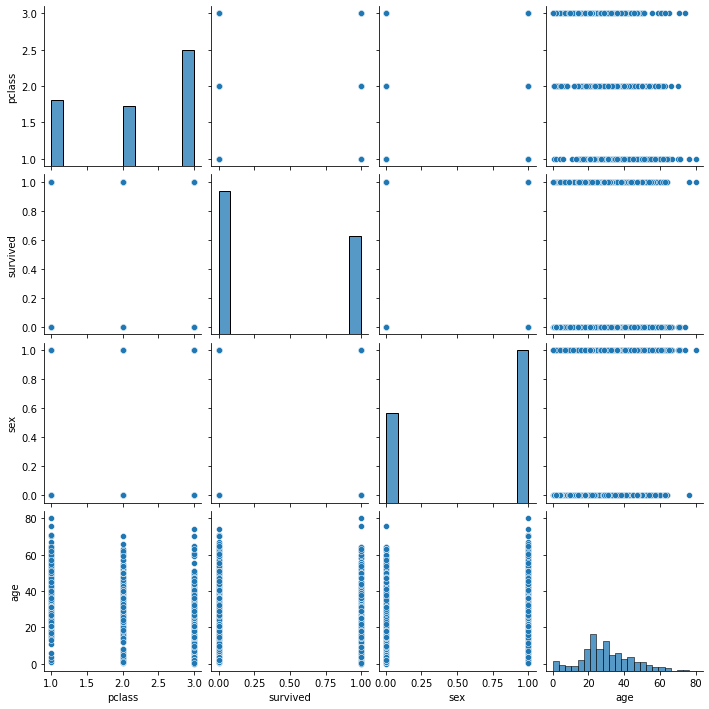

In [19]:
sns.pairplot(titanic_data)

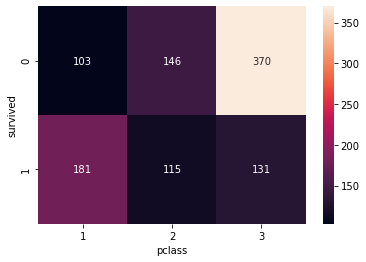

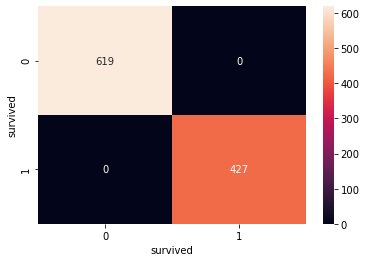

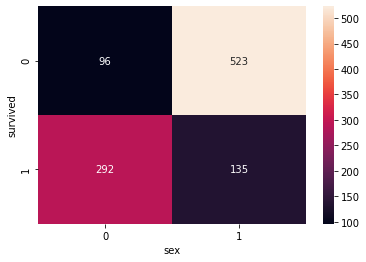

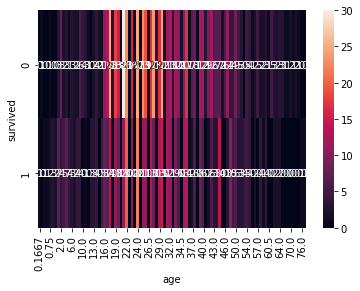

In [20]:
for col in titanic_data:
    plt.figure()
    sns.heatmap(pd.crosstab(titanic_data['survived'], titanic_data[col]),annot=True,fmt='d')

### Modelisation

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
from sklearn.model_selection import learning_curve
from sklearn.metrics import f1_score,recall_score
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline

In [48]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [54]:
preprocessor = make_pipeline(PolynomialFeatures(2, include_bias=False), SelectKBest(f_classif, k=9))

In [55]:
RandomForest = make_pipeline(preprocessor, RandomForestClassifier(random_state=0))
AdaBoost = make_pipeline(preprocessor, AdaBoostClassifier(random_state=0))
SVM = make_pipeline(preprocessor, StandardScaler(), SVC(random_state=0))
KNN = make_pipeline(preprocessor, StandardScaler(), KNeighborsClassifier())

In [56]:
dict_of_models = {'RandomForest': RandomForest,
                  'AdaBoost' : AdaBoost,
                  'SVM': SVM,
                  'KNN': KNN
                 }

In [57]:
AdaBoost = AdaBoostClassifier(random_state=0)

In [58]:
def evaluation(model):
    
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    
    print(confusion_matrix(y_test,y_pred))
    print(classification_report(y_test,y_pred))
    
    N, train_score, val_score = learning_curve(model, X_train, y_train, cv=4,scoring ='f1', train_sizes=np.linspace(0.1,1,10))
    
    plt.figure(figsize = (12,8))
    plt.plot(N,train_score.mean(axis=1), label = 'train_score')
    plt.plot(N,val_score.mean(axis=1), label = 'val_score')
    plt.legend()

RandomForest
[[98 16]
 [33 63]]
              precision    recall  f1-score   support

           0       0.75      0.86      0.80       114
           1       0.80      0.66      0.72        96

    accuracy                           0.77       210
   macro avg       0.77      0.76      0.76       210
weighted avg       0.77      0.77      0.76       210

AdaBoost
[[101  13]
 [ 36  60]]
              precision    recall  f1-score   support

           0       0.74      0.89      0.80       114
           1       0.82      0.62      0.71        96

    accuracy                           0.77       210
   macro avg       0.78      0.76      0.76       210
weighted avg       0.78      0.77      0.76       210

SVM
[[110   4]
 [ 46  50]]
              precision    recall  f1-score   support

           0       0.71      0.96      0.81       114
           1       0.93      0.52      0.67        96

    accuracy                           0.76       210
   macro avg       0.82      0.74    

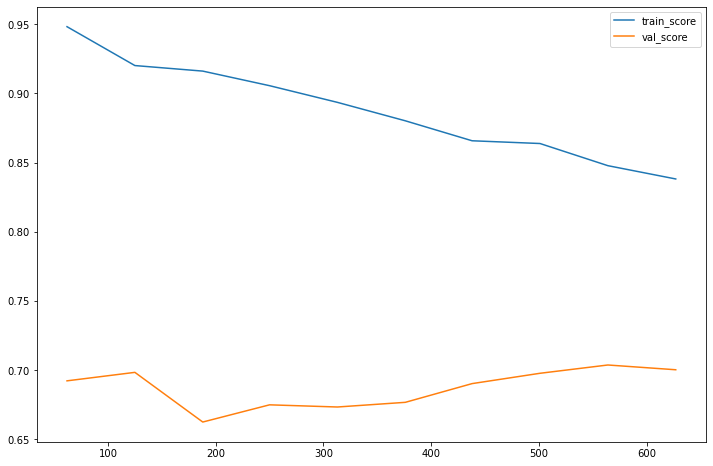

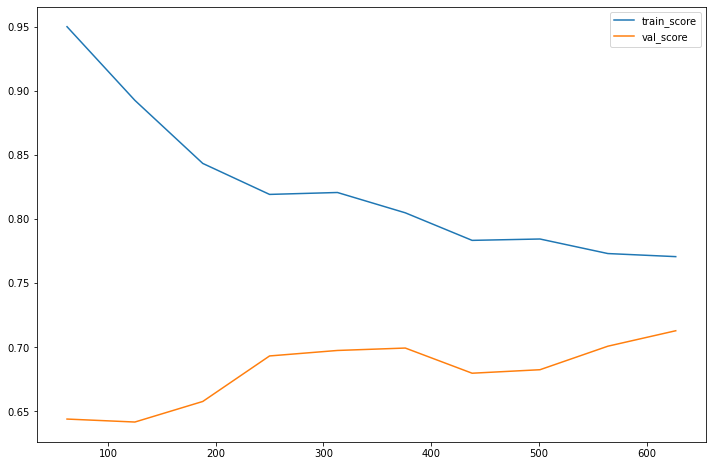

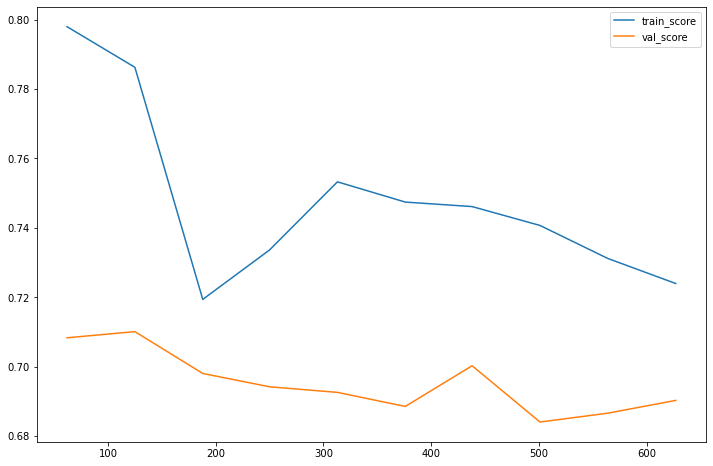

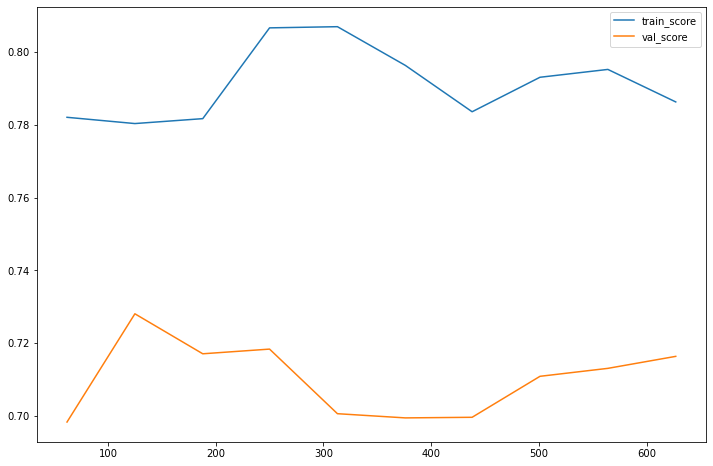

In [59]:
for name, model in dict_of_models.items():
    print(name)
    evaluation(model)

In [109]:
AdaBoost

AdaBoostClassifier(random_state=0)

In [60]:
hyper_params = {  'n_estimators': [50, 100, 200],  # Nombre d'estimateurs dans l'ensemble AdaBoost
    'learning_rate': [0.01, 0.1, 1.0],  # Taux d'apprentissage pour AdaBoost
    'base_estimator': [None],  # Utilisation des arbres de décision faibles par défaut
    'algorithm': ['SAMME', 'SAMME.R'],  # Algorithme pour calculer les poids des échantillons
    'random_state': [42]  # Pour rendre les résultats reproductibles
}


In [61]:

# Définir la grille des hyperparamètres à rechercher

# Créer un objet AdaBoostClassifier
adaboost = AdaBoostClassifier()

# Créer un objet GridSearchCV pour rechercher les meilleurs hyperparamètres
grid_search = GridSearchCV(adaboost, hyper_params, cv=5, scoring='accuracy')

# Exécuter la recherche sur grille
grid_search.fit(X, y)

# Afficher les meilleurs paramètres trouvés
print("Meilleurs paramètres trouvés :", grid_search.best_params_)


Meilleurs paramètres trouvés : {'algorithm': 'SAMME', 'base_estimator': None, 'learning_rate': 0.01, 'n_estimators': 50, 'random_state': 42}


In [62]:
grid = GridSearchCV(AdaBoost, hyper_params, cv=5, scoring='accuracy')

grid.fit(X_train, y_train)

print(grid.best_params_)

y_pred = grid.predict(X_test)

print(classification_report(y_test, y_pred))

{'algorithm': 'SAMME.R', 'base_estimator': None, 'learning_rate': 0.1, 'n_estimators': 200, 'random_state': 42}
              precision    recall  f1-score   support

           0       0.77      0.86      0.81       114
           1       0.81      0.70      0.75        96

    accuracy                           0.79       210
   macro avg       0.79      0.78      0.78       210
weighted avg       0.79      0.79      0.78       210



In [64]:
grid.score(X_test,y_test)

0.7857142857142857

In [65]:
y_pred = grid.predict(X_test)

In [66]:
grid.best_params_

{'algorithm': 'SAMME.R',
 'base_estimator': None,
 'learning_rate': 0.1,
 'n_estimators': 200,
 'random_state': 42}

In [67]:
grid.best_score_

0.7895209580838323

In [76]:
def survie(grid,pclass= 3,sex = 1,age= 23):
    X = np.array([pclass,sex,age]).reshape(1,3)
    print(grid.predict(X))
    print(grid.predict_proba(X))

In [92]:
survie(grid,3,0,64)

[0]
[[0.50835558 0.49164442]]


In [93]:
f1_score(y_test,y_pred)

0.7486033519553071

In [94]:
recall_score(y_test,y_pred)

0.6979166666666666

In [97]:
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
conf_matrix = confusion_matrix(y_test,y_pred)
conf_matrix

array([[98, 16],
       [29, 67]], dtype=int64)

In [107]:
predictions

array([1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0,